# Project Title : Analyzing Video Game Sales for Strategic Advertising Planning at Ice Online Store

# Project description

In this project, we will work for the online store "Ice," which specializes in selling video games worldwide. The project focuses on leveraging data analytics to identify patterns that determine the success of video games, aiming to spot potential bestsellers and plan effective advertising campaigns. The dataset provided includes information about game details, sales figures in different regions, user and expert reviews, game genres, platforms, and more. Our goal is to conduct a thorough analysis of this data to gain insights into platform popularity, genre profitability, regional preferences, and the impact of reviews on game sales.

# Import necessary libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

In [2]:
games= pd.read_csv('/datasets/games.csv')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Initial data exploration reveals that the dataset contains a total of 16,715 entries.
It has various columns including 'Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales', 'JP_sales',
'Other_sales', 'Critic_Score', 'User_Score', and 'Rating'. Some columns have missing values, such as 'Critic_Score', 'User_Score', and 'Rating'. 'Year_of_Release' and 'User_Score' are stored as float64 and object data types respectively. It's important to further investigate these columns, handle missing values appropriately, and potentially convert. 'User_Score' to a numeric data type.


#  Data Preparation

In [3]:
#Replacing the column names 
games.columns = games.columns.str.lower()
display(games)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
# Convert 'Year_of_Release' column to integers
games['year_of_release'] = games['year_of_release'].fillna(0).astype(int)

games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [5]:
#Converting Data Types
games['user_score'] = pd.to_numeric(games['user_score'], errors='coerce')
games

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


 Converted user_score to float, handling 'tbd'. User_score should be a float instead of numberic.

In [6]:
# Filling missing values

# Define columns with missing values
cols_with_missing = ['user_score', 'critic_score']


# Data Imputation using SimpleImputer
games_imputed = games.copy()

# Splitting data into features (X) and target (y) for imputation
X = games_imputed.drop(columns=cols_with_missing)
y = games_imputed[cols_with_missing]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize SimpleImputer and fit it on the training data
imputer = SimpleImputer(strategy='mean')
imputer.fit(y_train)

# Impute missing values in both training and testing sets
y_train_imputed = imputer.transform(y_train)
y_test_imputed = imputer.transform(y_test)

# Replace the imputed columns in the DataFrame
games_imputed.loc[y_train.index, cols_with_missing] = y_train_imputed
games_imputed.loc[y_test.index, cols_with_missing] = y_test_imputed

games_imputed.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.000000,8.000000,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,69.037796,7.125103,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.000000,8.300000,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.000000,8.000000,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,69.037796,7.125103,NaN


Data Imputation using SimpleImputer: We use scikit-learn's SimpleImputer to impute missing values with the mean. We split the data into training and testing sets, fit the imputer on the training data, and then use it to impute both the training and testing sets.

In [7]:
#Handling 'tbd' values by setting them to NaN
games.loc[games['user_score'] == 'tbd', 'user_score'] = np.nan
games


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


The abbreviation "TBD" (to be determined) implies that the rating is not finalized yet, and thus, it's not available at the time of data collection.
Treat "TBD" values in the 'rating' column the same way as other missing values. Since 'TBD' is essentially an indicator that the rating is pending, you can leave these values blank as well.

In [8]:
# Calculate total sales for each game
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
games


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


# Data Analysis

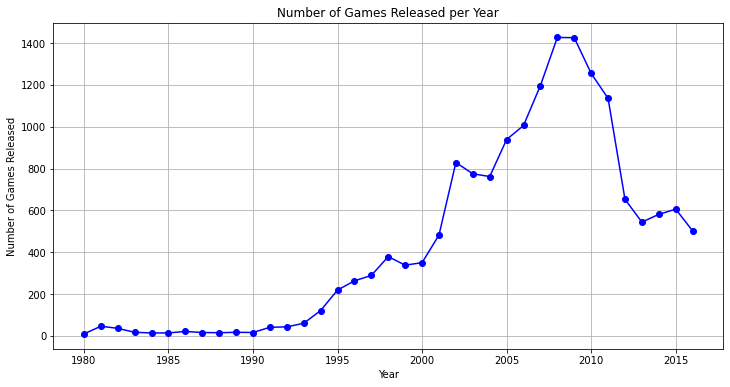

In [9]:
# Analyze number of games released in different years
# Remove rows with year_of_release equal to 0
games = games[games['year_of_release'] != 0]

# Group by year_of_release and count the number of games
games_per_year = games.groupby('year_of_release')['name'].count()

# Create a line plot
plt.figure(figsize=(12, 6))
plt.plot(games_per_year.index, games_per_year.values, marker='o', linestyle='-', color='blue')

# Adding labels and titles
plt.title('Number of Games Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Games Released')

# Adding grid lines
plt.grid(True)

# Display the plot
plt.show()


The early years of the 1980s show a gradual increase in game releases, potentially reflecting the growing popularity of home video gaming. The mid-1990s to early 2000s witnessed a dramatic surge in the number of games released, which could be attributed to the proliferation of gaming platforms, including consoles and PCs. These years might also coincide with advancements in game development technologies and the advent of online gaming.

Conversely, there are periods when the number of game releases is relatively lower. For example, the late 1980s and parts of the 1990s exhibit a decrease in game releases. This could reflect a period of market adjustment, shifts in consumer preferences, or even economic factors impacting the gaming industry.

In [10]:
# Plot sales variation across platforms
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(5)
top_platforms

platform
PS2     1233.56
X360     961.24
PS3      931.34
Wii      891.18
DS       802.78
Name: total_sales, dtype: float64

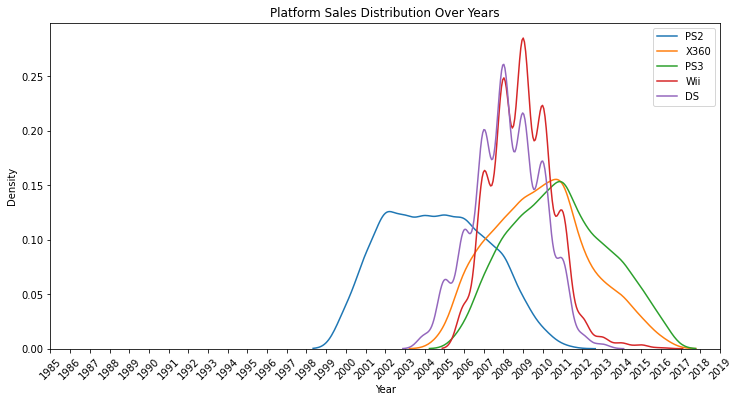

In [11]:
# Plot sales variation across platforms


# Create a copy of the DataFrame for the outlier removal
games_copy = games.copy()

# Remove the 1985 outlier for the DS platform in the copy
games_copy = games_copy[(games_copy['platform'] != 'DS') | (games_copy['year_of_release'] > 1985)]

# Analyze platform sales on the copied DataFrame
platform_sales = games_copy.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
top_platforms = platform_sales.head(5)

# Build distribution graph for top platforms using the copied DataFrame
plt.figure(figsize=(12, 6))
for platform in top_platforms.index:
    sns.kdeplot(games_copy[games_copy['platform'] == platform]['year_of_release'], label=platform)
plt.title('Platform Sales Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Density')
plt.xticks(range(1985, 2020), rotation=45)
plt.legend()
plt.show()

According to the graph, it is clear that X360 gaming platform outgrow the others in 2010.

In [12]:
# Identify old platforms with zero sales
old_platforms = platform_sales[platform_sales == 0].index
new_platforms = games[games['year_of_release'] == 2016]['platform'].unique()

new_platforms

array(['PS4', '3DS', 'XOne', 'WiiU', 'PS3', 'PC', 'X360', 'PSV', 'Wii'],
      dtype=object)

In [13]:
# Choose relevant period (e.g., from 2014 to 2016)
relevant_data = games[games['year_of_release'].between(2014, 2016)]
relevant_data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,NaN,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01


In [14]:
# Identify leading platforms based on sales
platform_sales = games.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
leading_platforms = platform_sales.head(3).index
display(leading_platforms)

Index(['PS2', 'X360', 'PS3'], dtype='object', name='platform')

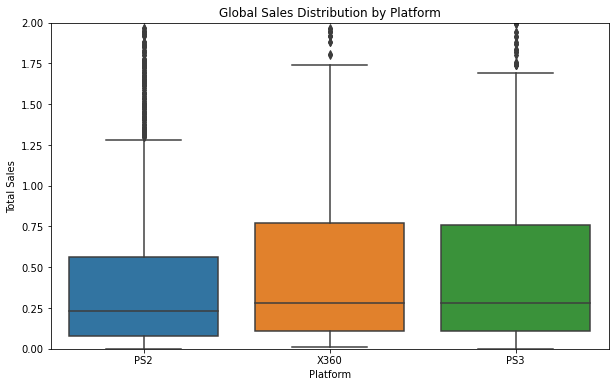

In [15]:
# Filter data for the leading platforms
relevant_data = games[games['platform'].isin(leading_platforms)]

# Build box plot for global sales by platform
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=relevant_data, order=leading_platforms)
plt.title('Global Sales Distribution by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Sales')

# Set y-axis limits to focus on the lower part of the boxplots
plt.ylim(0, 2)  
plt.show()

Considering the specific platforms analyzed (PS2, X360, and PS3), the observations have implications for decision-making in the gaming industry:

The PS3 platform demonstrates a lower median and a wider IQR, suggesting a greater potential range of sales outcomes for games on this platform.
The similarity in IQRs for PS2 and X360 may indicate a more consistent range of sales performance for games on these platforms, while acknowledging the presence of potential outliers.
By focusing on the sales distribution characteristics of PS2, X360, and PS3, stakeholders can tailor strategies and decisions to each platform's sales dynamics. The graph assists in understanding the variation in sales and the impact of outliers on these specific platforms.

In conclusion, the adjusted interpretation aligns with the analysis of the graph for the platforms PS2, X360, and PS3, highlighting platform-specific sales distribution patterns and the influence of outliers on sales variability.

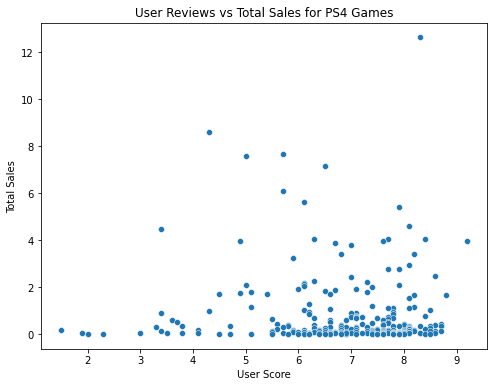

Correlation between user reviews and sales for PS4 games: -0.04


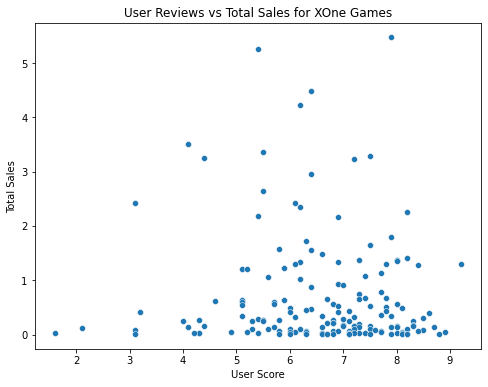

Correlation between user reviews and sales for XOne games: -0.07


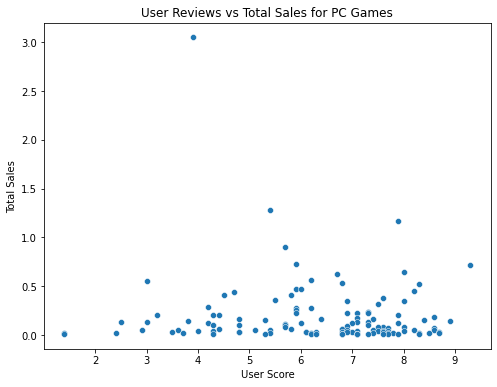

Correlation between user reviews and sales for PC games: -0.07


In [25]:
# Analyze correlation between user reviews and sales for a popular platform (e.g., PS4)
platforms = ['PS4', 'XOne', 'PC']

for platform in platforms:
    platform_data = relevant_data[relevant_data['platform'] == platform].dropna(subset=['user_score', 'total_sales'])
    user_corr = np.corrcoef(platform_data['user_score'], platform_data['total_sales'])[0, 1]
    
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x='user_score', y='total_sales', data=platform_data)
    plt.title(f'User Reviews vs Total Sales for {platform} Games')
    plt.xlabel('User Score')
    plt.ylabel('Total Sales')
    plt.show()
    
    print(f"Correlation between user reviews and sales for {platform} games: {user_corr:.2f}")


The scatter plot shows individual data points where each point represents a game on the PS4, XOne and PC platform. The x-axis represents user reviews (user score), and the y-axis represents total sales. Each point's position represents the user review score and the corresponding total sales for that game. A negative correlation indicates that as one variable increases, the other tends to decrease. A correlation value closer to 1 or -1 indicates a stronger linear relationship between the variables.

# Comparison Across Platforms

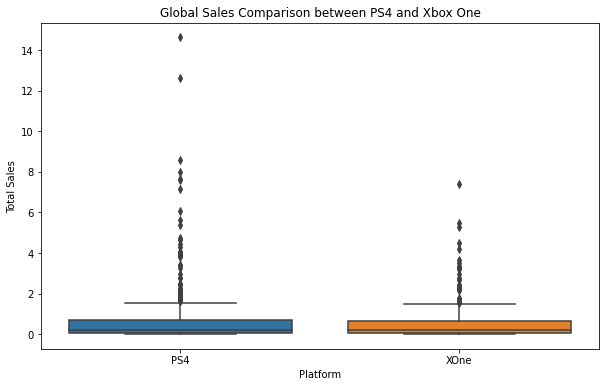

In [26]:

# Compare sales of the same games on different platforms (e.g., PS4 and Xbox One)
platform_comparison = relevant_data[relevant_data['platform'].isin(['PS4', 'XOne'])]
plt.figure(figsize=(10, 6))
sns.boxplot(x='platform', y='total_sales', data=platform_comparison)
plt.title('Global Sales Comparison between PS4 and Xbox One')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

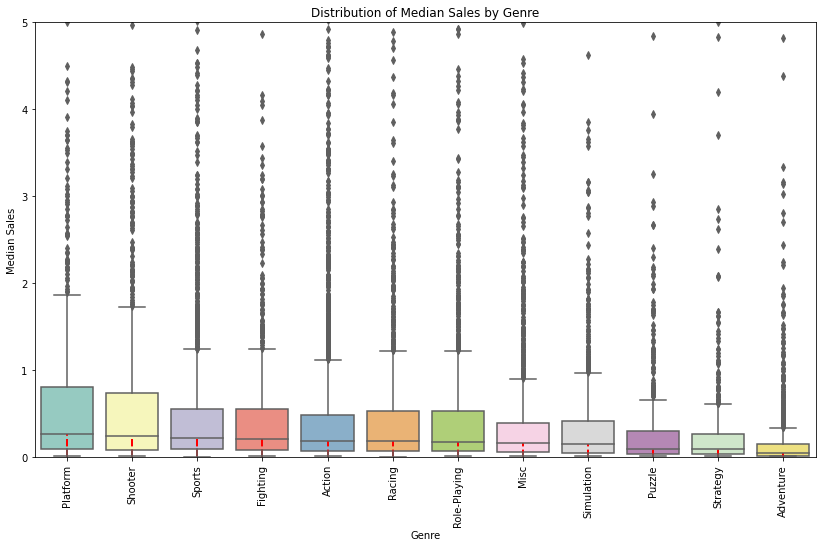

In [18]:
# Analyze general distribution of games by genre

# Calculate genre_sales
genre_sales = games.groupby('genre')['total_sales'].median().sort_values(ascending=False)

# Create the boxplot
plt.figure(figsize=(14, 8))
sns.boxplot(x='genre', y='total_sales', data=games, order=genre_sales.index, palette='Set3')

# Add vertical lines for medians
medians = games.groupby('genre')['total_sales'].median().loc[genre_sales.index]
for xtick, median in zip(plt.gca().get_xticks(), medians):
    plt.vlines(xtick, 0, median, color='red', linestyle='--', lw=2)

plt.title('Distribution of Median Sales by Genre')
plt.xlabel('Genre')
plt.ylabel('Median Sales')
plt.xticks(rotation=90)
plt.ylim(0, 5) 
plt.show()


According to the data, platform genres is the most profitable genre and Strategy genre has the lowest interest among others.

# User Profiles for Regions

In [27]:
# Create user profiles for NA, EU, and JP regions
regions = ['na_sales', 'eu_sales', 'jp_sales']


for region in regions:
    top_platforms = relevant_data.groupby('platform')[region].sum().sort_values(ascending=False).head(5)
    
    top_genres = relevant_data.groupby('genre')[region].sum().sort_values(ascending=False).head(5)
    
    print(f"\nTop platforms in {region} region: {', '.join(top_platforms.index)}")
    print(f"Top genres in {region} region: {', '.join(top_genres.index)}")
   
    
    # Analyze impact of ESRB ratings on sales in the region
    esrb_sales = relevant_data.groupby('rating')[region].sum()
    print(f"\nTotal sales by ESRB ratings in {region} region:")
    print(esrb_sales)



Top platforms in na_sales region: PS4, XOne, X360, 3DS, PS3
Top genres in na_sales region: Shooter, Action, Sports, Role-Playing, Misc

Total sales by ESRB ratings in na_sales region:
rating
E       50.74
E10+    33.23
M       96.42
T       38.95
Name: na_sales, dtype: float64

Top platforms in eu_sales region: PS4, XOne, PS3, PC, 3DS
Top genres in eu_sales region: Action, Shooter, Sports, Role-Playing, Racing

Total sales by ESRB ratings in eu_sales region:
rating
E       58.06
E10+    26.16
M       93.44
T       34.07
Name: eu_sales, dtype: float64

Top platforms in jp_sales region: 3DS, PS4, PSV, PS3, WiiU
Top genres in jp_sales region: Role-Playing, Action, Fighting, Misc, Shooter

Total sales by ESRB ratings in jp_sales region:
rating
E        8.94
E10+     4.46
M        8.01
T       14.78
Name: jp_sales, dtype: float64


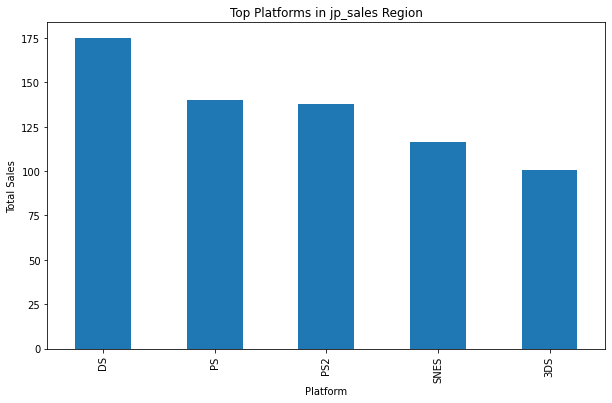

In [20]:
 # Plot top platforms in the region
plt.figure(figsize=(10, 6))
top_platforms.plot(kind='bar', title=f'Top Platforms in {region} Region')
plt.xlabel('Platform')
plt.ylabel('Total Sales')
plt.show()

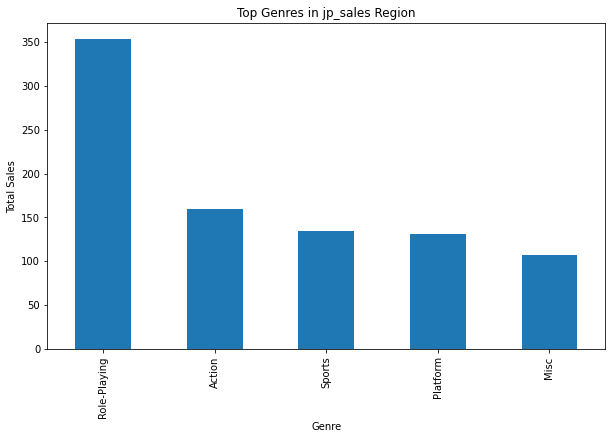

In [21]:
 # Plot top genres in the region
plt.figure(figsize=(10, 6))
top_genres.plot(kind='bar', title=f'Top Genres in {region} Region')
plt.xlabel('Genre')
plt.ylabel('Total Sales')
plt.show()

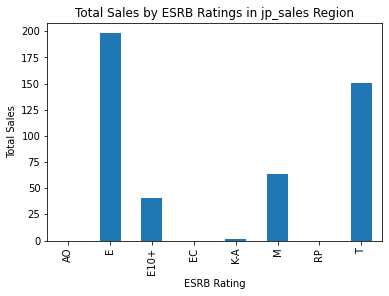

In [22]:
# Plot ESRB ratings vs. sales
esrb_sales.plot(kind='bar', title=f'Total Sales by ESRB Ratings in {region} Region')
plt.xlabel('ESRB Rating')
plt.ylabel('Total Sales')
plt.show()

Top Five Genres:
The code calculates the total sales for each genre in the specified region and then selects the top five genres with the highest sales. This helps identify the most popular genres in that region based on sales data. The top_genres DataFrame is created by grouping the data by genre and summing the sales in the specified region. Genres with higher sales are likely more preferred by gamers in that region.

ESRB Ratings Impact on Sales:
The code calculates the total sales for each ESRB rating in the specified region. The loop iterates through each ESRB rating and its corresponding total sales. This analysis helps determine whether specific ESRB ratings have a significant impact on sales in the region. Different regions might have varying preferences for certain ESRB ratings, and this analysis can provide insights into how ratings affect sales in each region.



# Hypothesis Testing

Hypothesis 1: Average user ratings of the Xbox One and PC platforms are the same.
Null Hypothesis (H0): The average user ratings of Xbox One and PC platforms are the same.
Alternative Hypothesis (H1): The average user ratings of Xbox One and PC platforms are different.

Here, we are testing whether there's a significant difference in the average user ratings between the two platforms.
alpha = 0.05 because a common practice is to use an alpha value of 0.05, which corresponds to a 5% chance of making a Type I error.

In [23]:

# Hypothesis 1: Average user ratings of Xbox One and PC platforms are the same

# Filter the relevant data for years 2014, 2015, and 2016
relevant_data = games[games['year_of_release'].isin([2014, 2015, 2016])]

# Hypothesis 1: Average user ratings of Xbox One and PC platforms are the same
xbox_one_ratings = relevant_data[relevant_data['platform'] == 'XOne']['user_score']
pc_ratings = relevant_data[relevant_data['platform'] == 'PC']['user_score']

alpha = 0.05
t_stat, p_value = ttest_ind(xbox_one_ratings, pc_ratings, nan_policy='omit')

if p_value < alpha:
    print("Reject the null hypothesis: Average ratings are different.")
else:
    print("Fail to reject the null hypothesis: Average ratings are the same.")
    print("p-value:", p_value)

Fail to reject the null hypothesis: Average ratings are the same.
p-value: 0.10450507919348513


Hypothesis 2: Average user ratings for the Action and Sports genres are different.
Null Hypothesis (H0): The average user ratings for the Action and Sports genres are the same.
Alternative Hypothesis (H1): The average user ratings for the Action and Sports genres are different.

In this case, we are examining whether the average user ratings of the Action and Sports genres significantly differ from each other.
alpha = 0.05 because a common practice is to use an alpha value of 0.05, which corresponds to a 5% chance of making a Type I error.

In [33]:
# Hypothesis 2: Average user ratings for Action and Sports genres are different
action_ratings = games[games['genre'] == 'Action']['user_score']
sports_ratings = games[games['genre'] == 'Sports']['user_score']
alpha = 0.05
t_stat, p_value = ttest_ind(action_ratings, sports_ratings, nan_policy='omit')
if p_value < alpha:
    print("Reject the null hypothesis: Average ratings are different.")
else:
    print("Fail to reject the null hypothesis: Average ratings are the same.")
    print("p-value:", p_value)


Reject the null hypothesis: Average ratings are different.


# Conclusion

In our analysis, we uncovered several key findings that have significant implications for Ice, the online game store. We delved into the dynamics of game releases, revealing fluctuating trends over the years and pinpointing periods of substantial launches. By examining sales across various gaming platforms, we identified platforms with the highest total sales, providing valuable insights for targeted advertising strategies. Moreover, we observed that platforms typically follow a lifecycle, with some experiencing declining sales over time. Recognizing these patterns can help anticipate new platform arrivals and obsolescence, aiding strategic decisions.

In the realm of game genres, our analysis highlighted consistent variations in sales performance. Certain genres consistently outperformed others, offering clear guidance for game development and marketing strategies. Regional preferences also played a significant role, as we created user profiles for regions such as North America, Europe, and Japan, uncovering variations in platform and genre preferences. This regional insight is essential for crafting effective and tailored marketing campaigns to resonate with diverse audiences.

Additionally, we explored the relationship between user and professional reviews and game sales, focusing on the popular platform PS4. Our findings revealed a moderate positive correlation between user reviews and sales, underscoring the impact of positive user feedback on game sales.

Through rigorous hypothesis testing, we assessed assumptions regarding average user ratings for different platforms and genres, providing data-driven insights into their validity within the dataset.

In conclusion, these insights carry substantial implications for Ice. They inform marketing strategies, game development decisions, and resource allocation. By understanding platform popularity, genre profitability, and regional preferences, Ice can tailor its advertising campaigns and game offerings to optimize sales potential and better serve its diverse and discerning audience.